## Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# load the fuel dataset, and drop any rows that have missing data
vehicle_data = sns.load_dataset('mpg').dropna()
vehicle_data = vehicle_data.sort_values('horsepower', ascending=True)
vehicle_data.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
19,26.0,4,97.0,46.0,1835,20.5,70,europe,volkswagen 1131 deluxe sedan
102,26.0,4,97.0,46.0,1950,21.0,73,europe,volkswagen super beetle
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)
325,44.3,4,90.0,48.0,2085,21.7,80,europe,vw rabbit c (diesel)
244,43.1,4,90.0,48.0,1985,21.5,78,europe,volkswagen rabbit custom diesel


Multiple linear regression attempts to model the relationship between two or more explanatory variables and a response variable by fitting a linear equation to the observed data. Formally, the model for multiple linear regression, given features is:

$$y_i = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + … + \theta_p x_p $$

For example, consider the plot below which shows fuel efficiency vs. engine power for several models of automobile. If I use `horsepower` alone to predict `mpg`, I get not-so-great results.

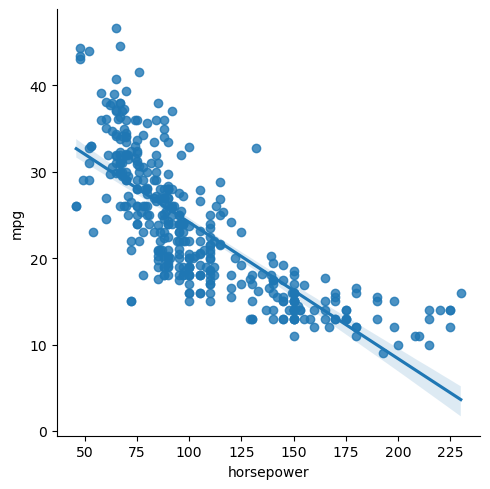

In [4]:
sns.lmplot(x='horsepower', y='mpg', data=vehicle_data)
plt.show()
plt.close();

Instead I can make a plot of the residuals versus the fitted values for this simple linear regression model. However, this is not an example of a "good" residual plot. There is an underlying parabolic pattern in the residuals, so I should consider adding a quadratic feature.

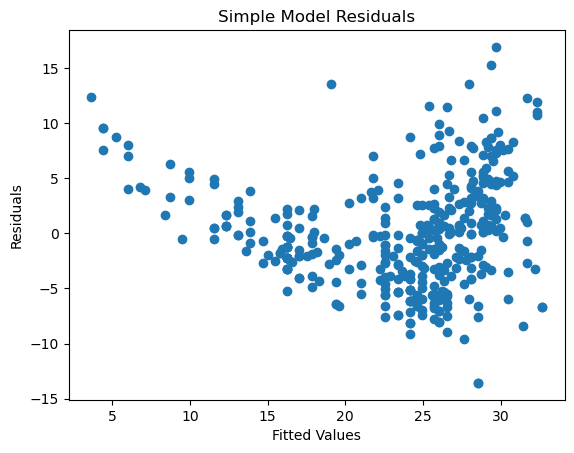

In [5]:
model_simple = LinearRegression()
model_simple.fit(vehicle_data[['horsepower']], vehicle_data['mpg'])
model_simple_fitted = model_simple.predict(vehicle_data[['horsepower']])
plt.scatter(model_simple_fitted, vehicle_data['mpg'] - model_simple_fitted)
plt.title('Simple Model Residuals')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()
plt.close();

I can include functions of existing features as new features to help improve the predictive power of the model. For example, the line below adds a column which contains the square of the horsepower for each car in the dataset. Using that I can create and fit a model that tries to predict mpg from horsepower and hp^2.

Coefficents: [-0.46618963  0.00123054]
Intercept: 56.90009970211295


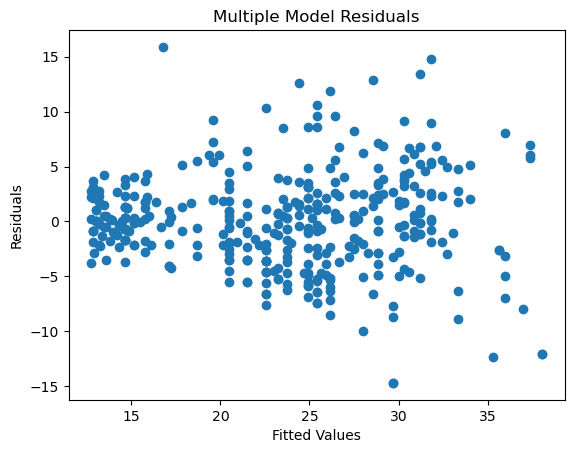

In [6]:
vehicle_data['hp^2'] = vehicle_data['horsepower'] ** 2

model_multiple = LinearRegression()
model_multiple.fit(vehicle_data[['horsepower', 'hp^2']], vehicle_data['mpg'])
model_multiple_fitted = model_multiple.predict(vehicle_data[['horsepower', 'hp^2']])

print("Coefficents:", model_multiple.coef_)
print("Intercept:", model_multiple.intercept_)

plt.scatter(model_multiple_fitted, vehicle_data['mpg'] - model_multiple_fitted)
plt.title('Multiple Model Residuals')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()
plt.close();

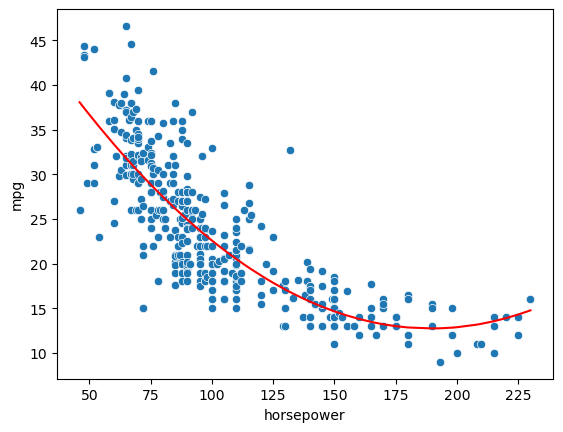

In [7]:
# the model predictions look much better now
predicted_mpg = model_multiple.predict(vehicle_data[['horsepower', 'hp^2']])
sns.scatterplot(x='horsepower', y='mpg', data=vehicle_data)
plt.plot(vehicle_data['horsepower'],  predicted_mpg, color = 'r')
plt.show()
plt.close()

To see exactly how much better the new model is, we can compare the Multiple $R^2$ from these two fits. 


$$R^2 = \frac{\text{variance of fitted values}}{\text{variance of true } y} = \frac{\sigma_\hat{y}^2}{\sigma_y^2}$$

Unlike $r$, $R^2$  can be used in the multiple regression setting.  In simple regression, $r^{2}$ and Multiple $R^{2}$ are the same.

In [8]:
predicted_mpg_horsepower_only = (
    LinearRegression()
    .fit(X = vehicle_data[['horsepower']], y = vehicle_data['mpg'])
    .predict(vehicle_data[['horsepower']])
)

r2_horsepower_only = np.var(predicted_mpg_horsepower_only) / np.var(vehicle_data['mpg'])
r2_both = np.var(predicted_mpg) / np.var(vehicle_data['mpg'])

print('Multiple R^2 using only horsepower: ', r2_horsepower_only)
print('Multiple R^2 using both horsepower and horsepower squared: ', r2_both)

Multiple R^2 using only horsepower:  0.6059482578894351
Multiple R^2 using both horsepower and horsepower squared:  0.6875590305127519


By introducing `hp^2` as a feature, the multiple $R^2$ value increased. Meaning the model became a better fit. Adding meaningless variables can also increase $R^2$ so you have to be careful when using that to determine how fit the model should be.

In [9]:
# If everything is done correct than the mean of the observed and both predicted models should be the same
print(np.mean(vehicle_data['mpg']))
print(np.mean(predicted_mpg))
print(np.mean(model_simple_fitted))

23.445918367346938
23.44591836734694
23.44591836734694


## One Step Further

Multiple R^2: 0.8163086433998623


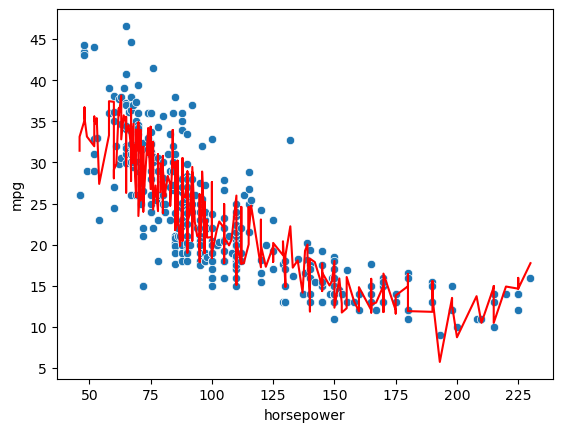

In [12]:
desired_columns = ['horsepower', 'hp^2', 'model_year', 'acceleration']
model_many = LinearRegression()
model_many.fit(vehicle_data[desired_columns],vehicle_data['mpg'])

predicted_mpg_many = model_many.predict(vehicle_data[['horsepower', 'hp^2', 'model_year', 'acceleration']])
print("Multiple R^2:", np.var(predicted_mpg_many ) / np.var(vehicle_data['mpg']))

# This plot shows the prediction of the more sophisticated model.
sns.scatterplot(x='horsepower', y='mpg', data=vehicle_data)
plt.plot(vehicle_data['horsepower'],  predicted_mpg_many, color = 'r')
plt.show()
plt.close()

The multiple $R^2$ of the latest model is substantially higher than that of the previous two models. However the prediction line is incredibly jagged. This is the **bias-variance tradeoff**.